# **Task 1 : Prediction using Supervised ML**

Name : **Divyanshu Bargali**

Task objectives : 

*   Predict the percentage of an student based on the no. of study hours using the provided dataset.
*   Predict score if a student studies for 9.25 hrs/day.



In [1]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading the data
Dataset : http://bit.ly/w-data

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data visualization

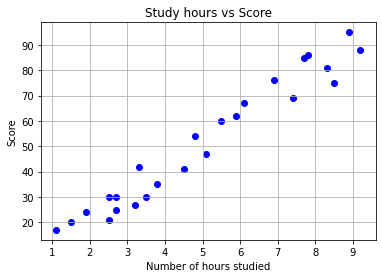

In [5]:
# plotting score distibution
plt.scatter(df["Hours"], df["Scores"], color = "b")
plt.xlabel("Number of hours studied")
plt.ylabel("Score")
plt.title("Study hours vs Score")
plt.grid()

### Data preprocessing

In [6]:
x = df[["Hours"]].values
y = df[["Scores"]].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) 

print("Train length = ", len(x_train))
print("Test length = ", len(x_test))

Train length =  18
Test length =  7


### Training the model

In [8]:
lr = LinearRegression()  
lr.fit(x_train, y_train) 

print("Training complete")

Training complete


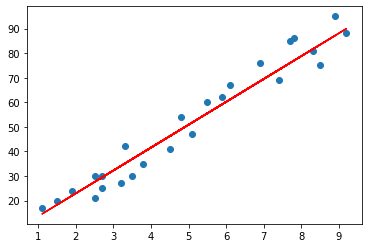

In [9]:
# Plotting the regression line
best_fit = lr.coef_ * x + lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, best_fit, color="r");
plt.show()

### Making preditions using trained model

In [10]:
print(x_test) #testing data
predictions = lr.predict(x_test) # making predictions on test data

# Comparing actual vs predicted
score = pd.DataFrame.from_records({ 'Actual Score': y_test.reshape(7,),'Predicted Score': predictions.reshape(7,) })

[[4.8]
 [4.5]
 [8.9]
 [5.9]
 [2.7]
 [3.2]
 [7.8]]


In [11]:
score

,Actual Score,Predicted Score
0,54,48.986681
1,41,46.194023
2,95,87.153001
3,62,59.226425
4,30,29.438078
5,27,34.092507
6,86,76.913257


### Predicting score when study hours = 9.25 Hours

In [12]:
hours = 9.25

pred_score = lr.predict(np.array([hours]).reshape((1, 1)))
print(f"No. of hours = {hours}")
print("Predicted Score = ", pred_score[0][0])

No. of hours = 9.25
Predicted Score =  90.41110159487049


## Evaluating Model Accuracy

In [13]:
accuracy = lr.score(x_test,y_test) * 100
accuracy = round(accuracy, 2)

print(f"The accuracy is = {accuracy} %")

The accuracy is = 93.94 %


In [14]:
from sklearn import metrics

print("Mean squared error is ", metrics.mean_squared_error(score["Actual Score"], score["Predicted Score"]))
print("Mean absolute error is ", metrics.mean_absolute_error(score["Actual Score"], score["Predicted Score"]))


Mean squared error is  36.36681054435926
Mean absolute error is  5.367012668357544


## Conclusion

*The model predicts student score of **90.4**, for **9.25** hours of study. The model accuaracy is **93.94%**.*